# Tabelle 

In [2]:
# 📦 Pakete laden
library(readxl)
library(dplyr)
library(tidyr)
library(writexl)  # Für Excel-Export
library(knitr)    # Für Anzeige im Notebook

# 📁 Datei einlesen
file_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA_short_Grouping.xlsx"
df <- read_excel(file_path)

# 📊 Daten vorbereiten
df_subset <- df %>%
  select(river_name, group_nr, average_DOC_sample, BDOC_pct, CO2_Flux) %>%
  mutate(Group = case_when(
    river_name == "Vestari_Joekulsa" ~ "Vestari-Jökulsá",
    river_name == "Virkisa" & group_nr == 1 ~ "Virkisá – Group 1",
    river_name == "Virkisa" & group_nr > 1 ~ "Virkisá – Group >1",
    river_name == "Virkisa" ~ "Virkisá – all"
  ))

# 📌 Gruppen & Variablen
groups <- c("Vestari-Jökulsá", "Virkisá – all", "Virkisá – Group 1", "Virkisá – Group >1")
variables <- c("average_DOC_sample", "BDOC_pct", "CO2_Flux")

# 🧮 Funktion für deskriptive Statistik
compute_summary <- function(df, group) {
  data <- if (group == "Virkisá – all") {
    df %>% filter(river_name == "Virkisa")
  } else {
    df %>% filter(Group == group)
  }
  
  lapply(variables, function(var) {
    values <- data[[var]]
    data.frame(
      Group = group,
      Variable = var,
      Minimum = round(min(values, na.rm = TRUE), 2),
      Maximum = round(max(values, na.rm = TRUE), 2),
      Median = round(median(values, na.rm = TRUE), 2),
      Mean = round(mean(values, na.rm = TRUE), 2),
      `Standard Deviation` = round(sd(values, na.rm = TRUE), 2),
      N = sum(!is.na(values))
    )
  }) %>% bind_rows()
}

# 📋 Tabelle erstellen
summary_table <- bind_rows(lapply(groups, function(g) compute_summary(df_subset, g)))

# 💾 Excel-Datei speichern
output_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Tabelle/Descriptive_Statistics.xlsx"
write_xlsx(summary_table, output_path)

# 📄 Tabelle im Notebook anzeigen
kable(summary_table, align = "l", caption = "Descriptive statistics of carbon-related variables by group")

# ✅ Hinweis ausgeben
cat("✅ Die Excel-Datei wurde gespeichert unter:\n", output_path)




Table: Descriptive statistics of carbon-related variables by group

|Group              |Variable           |Minimum |Maximum |Median |Mean   |Standard.Deviation |N  |
|:------------------|:------------------|:-------|:-------|:------|:------|:------------------|:--|
|Vestari-Jökulsá    |average_DOC_sample |0.07    |0.28    |0.14   |0.15   |0.05               |18 |
|Vestari-Jökulsá    |BDOC_pct           |-37.40  |62.98   |27.46  |23.09  |25.93              |14 |
|Vestari-Jökulsá    |CO2_Flux           |-13.19  |12.27   |-5.84  |-1.47  |9.99               |16 |
|Virkisá – all      |average_DOC_sample |0.10    |0.59    |0.22   |0.26   |0.13               |43 |
|Virkisá – all      |BDOC_pct           |-32.23  |69.68   |31.35  |26.97  |28.26              |43 |
|Virkisá – all      |CO2_Flux           |-108.84 |-17.59  |-56.82 |-58.55 |30.46              |17 |
|Virkisá – Group 1  |average_DOC_sample |0.10    |0.17    |0.13   |0.13   |0.02               |14 |
|Virkisá – Group 1  |BDOC_pct 

✅ Die Excel-Datei wurde gespeichert unter:
 C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Tabelle/Descriptive_Statistics.xlsx

# beide Flüsse boxplots

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."
Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_boxplot()`)."


✅ Boxplot gespeichert unter:
 C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Tabelle/Boxplot_Groups.png

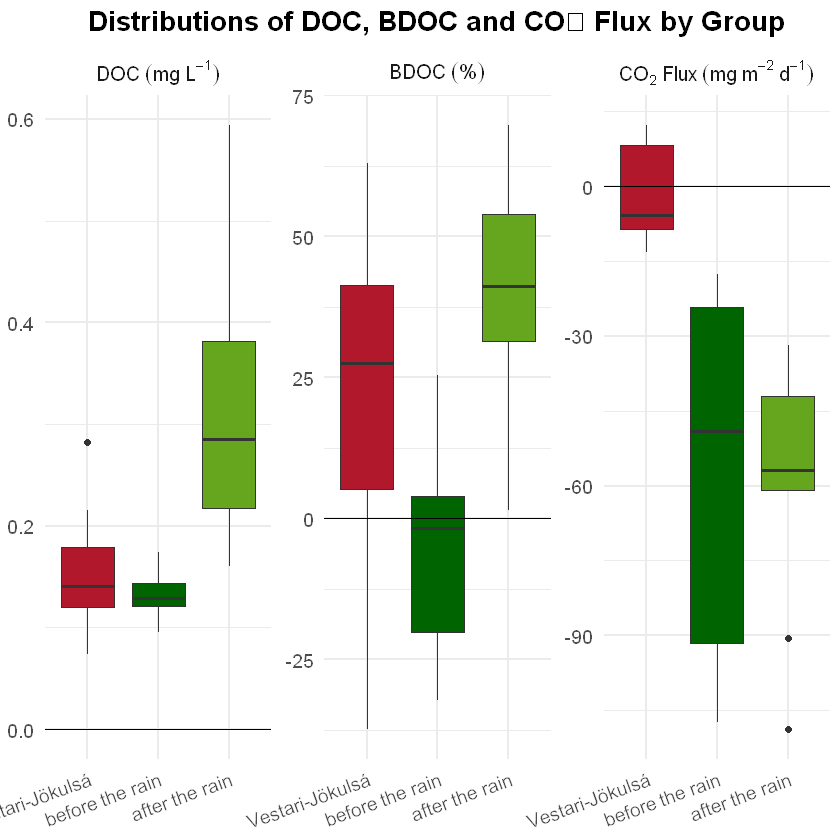

In [7]:
# 📦 Pakete laden
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)

# 📁 Datei einlesen
file_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA_short_Grouping.xlsx"
df <- read_excel(file_path)

# 📊 Daten vorbereiten
df_subset <- df %>%
  select(river_name, group_nr, average_DOC_sample, BDOC_pct, CO2_Flux) %>%
  mutate(Group = case_when(
    river_name == "Vestari_Joekulsa" ~ "Vestari-Jökulsá",
    river_name == "Virkisa" & group_nr == 1 ~ "before the rain",
    river_name == "Virkisa" & group_nr > 1 ~ "after the rain",
    river_name == "Virkisa" ~ "Virkisá – all"
  ))

# 📊 Nur ausgewählte Gruppen
df_long <- df_subset %>%
  filter(Group %in% c("Vestari-Jökulsá", "before the rain", "after the rain")) %>%
  pivot_longer(cols = c(average_DOC_sample, BDOC_pct, CO2_Flux),
               names_to = "Variable", values_to = "Value")

# 🎨 Farben festlegen
farben <- c(
  "Vestari-Jökulsá" = "#B2182B",
  "before the rain" = "#006400",
  "after the rain" = "#66A61E"
)

# 🏷️ Reihenfolge festlegen
df_long$Group <- factor(df_long$Group, levels = c("Vestari-Jökulsá", "before the rain", "after the rain"))

# 🏷️ Labels für Facets
variable_labels <- c(
  average_DOC_sample = "DOC~(mg~L^{-1})",
  BDOC_pct = "BDOC~('%')",
  CO2_Flux = "CO[2]~Flux~(mg~m^{-2}~d^{-1})"
)

# 📊 Plot erstellen
p <- ggplot(df_long, aes(x = Group, y = Value, fill = Group)) +
  geom_boxplot() +
  geom_hline(yintercept = 0, linetype = "solid", color = "black", size = 0.5) + # <-- Linie bei 0
  facet_wrap(~Variable, scales = "free_y", nrow = 1, 
             labeller = as_labeller(variable_labels, default = label_parsed)) +
  scale_fill_manual(values = farben) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 20, hjust = 1),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.margin = margin(2, 2, 2, 2, "mm")
  ) +
  labs(
    x = NULL, y = NULL,
    title = "Distributions of DOC, BDOC and CO₂ Flux by Group"
  )

# 💾 Speicherpfad
output_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Tabelle/Boxplot_Groups.png"

# 💾 Plot speichern
ggsave(filename = output_path,
       plot = p,
       width = 210,   # mm
       height = 80,   # mm
       units = "mm",
       dpi = 300,
       bg = "white",
       limitsize = FALSE)

# ✅ Plot in Jupyter anzeigen
print(p)

# ✅ Hinweis ausgeben
cat("✅ Boxplot gespeichert unter:\n", output_path)


Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_boxplot()`)."


✅ Boxplot gespeichert unter:
 C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Tabelle/Boxplot_Groups.png

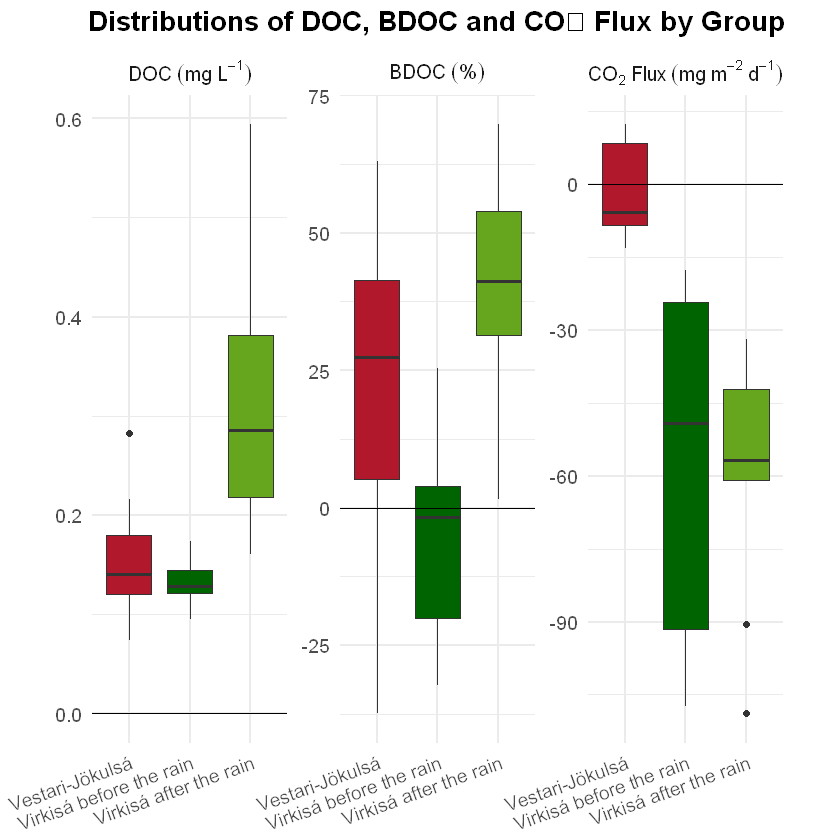

In [8]:
# 📦 Pakete laden
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)

# 📁 Datei einlesen
file_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA_short_Grouping.xlsx"
df <- read_excel(file_path)

# 📊 Daten vorbereiten
df_subset <- df %>%
  select(river_name, group_nr, average_DOC_sample, BDOC_pct, CO2_Flux) %>%
  mutate(Group = case_when(
    river_name == "Vestari_Joekulsa" ~ "Vestari-Jökulsá",
    river_name == "Virkisa" & group_nr == 1 ~ "Virkisá before the rain",
    river_name == "Virkisa" & group_nr > 1 ~ "Virkisá after the rain",
    river_name == "Virkisa" ~ "Virkisá – all"
  ))

# 📊 Nur ausgewählte Gruppen
df_long <- df_subset %>%
  filter(Group %in% c("Vestari-Jökulsá", "Virkisá before the rain", "Virkisá after the rain")) %>%
  pivot_longer(cols = c(average_DOC_sample, BDOC_pct, CO2_Flux),
               names_to = "Variable", values_to = "Value")

# 🎨 Farben festlegen
farben <- c(
  "Vestari-Jökulsá" = "#B2182B",
  "Virkisá before the rain" = "#006400",
  "Virkisá after the rain" = "#66A61E"
)

# 🏷️ Reihenfolge festlegen
df_long$Group <- factor(df_long$Group, levels = c("Vestari-Jökulsá", "Virkisá before the rain", "Virkisá after the rain"))

# 🏷️ Labels für Facets
variable_labels <- c(
  average_DOC_sample = "DOC~(mg~L^{-1})",
  BDOC_pct = "BDOC~('%')",
  CO2_Flux = "CO[2]~Flux~(mg~m^{-2}~d^{-1})"
)

# 📊 Plot erstellen
p <- ggplot(df_long, aes(x = Group, y = Value, fill = Group)) +
  geom_boxplot() +
  geom_hline(yintercept = 0, linetype = "solid", color = "black", size = 0.5) +
  facet_wrap(~Variable, scales = "free_y", nrow = 1, 
             labeller = as_labeller(variable_labels, default = label_parsed)) +
  scale_fill_manual(values = farben) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 20, hjust = 1),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.margin = margin(2, 12, 2, 12, "mm") # linker/rechter Rand größer
  ) +
  labs(
    x = NULL, y = NULL,
    title = "Distributions of DOC, BDOC and CO₂ Flux by Group"
  )

# 💾 Speicherpfad
output_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Tabelle/Boxplot_Groups.png"

# 💾 Plot speichern
ggsave(filename = output_path,
       plot = p,
       width = 210,   # mm
       height = 80,   # mm
       units = "mm",
       dpi = 300,
       bg = "white",
       limitsize = FALSE)

# ✅ Plot in Jupyter anzeigen
print(p)

# ✅ Hinweis ausgeben
cat("✅ Boxplot gespeichert unter:\n", output_path)


# violinplots


Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_ydensity()`)."
Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_ydensity()`)."
Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_boxplot()`)."


✅ Violin + Boxplot gespeichert unter:
 C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Tabelle/Violin_Boxplot_Groups.png

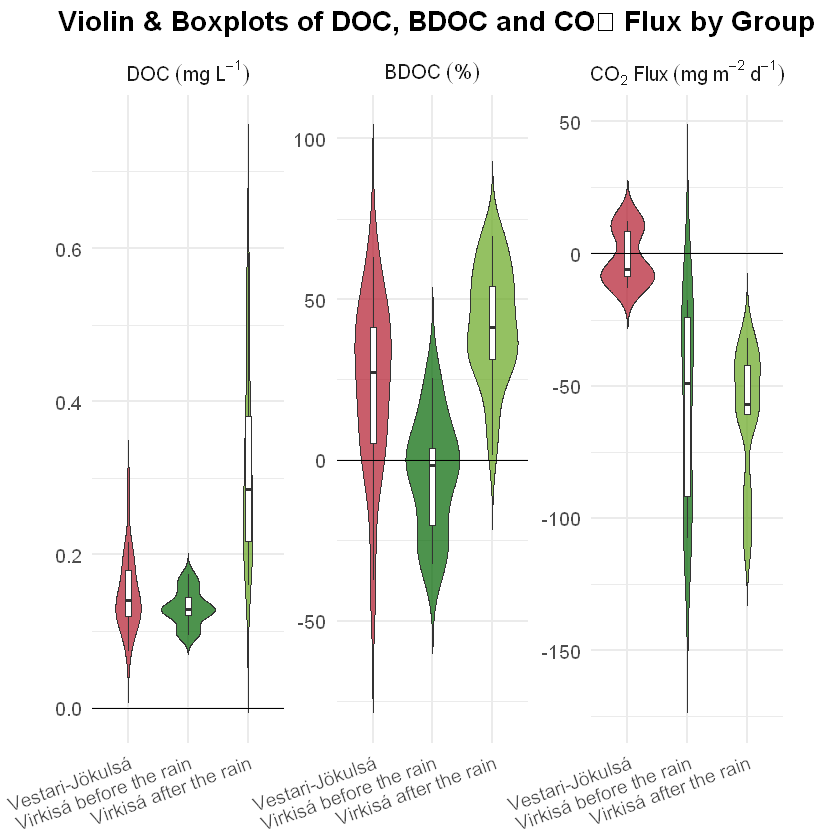

In [9]:
# 📦 Pakete laden
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)

# 📁 Datei einlesen
file_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA_short_Grouping.xlsx"
df <- read_excel(file_path)

# 📊 Daten vorbereiten
df_subset <- df %>%
  select(river_name, group_nr, average_DOC_sample, BDOC_pct, CO2_Flux) %>%
  mutate(Group = case_when(
    river_name == "Vestari_Joekulsa" ~ "Vestari-Jökulsá",
    river_name == "Virkisa" & group_nr == 1 ~ "Virkisá before the rain",
    river_name == "Virkisa" & group_nr > 1 ~ "Virkisá after the rain",
    river_name == "Virkisa" ~ "Virkisá – all"
  ))

# 📊 Nur ausgewählte Gruppen
df_long <- df_subset %>%
  filter(Group %in% c("Vestari-Jökulsá", "Virkisá before the rain", "Virkisá after the rain")) %>%
  pivot_longer(cols = c(average_DOC_sample, BDOC_pct, CO2_Flux),
               names_to = "Variable", values_to = "Value")

# 🎨 Farben festlegen
farben <- c(
  "Vestari-Jökulsá" = "#B2182B",
  "Virkisá before the rain" = "#006400",
  "Virkisá after the rain" = "#66A61E"
)

# 🏷️ Reihenfolge festlegen
df_long$Group <- factor(df_long$Group, levels = c("Vestari-Jökulsá", "Virkisá before the rain", "Virkisá after the rain"))

# 🏷️ Labels für Facets
variable_labels <- c(
  average_DOC_sample = "DOC~(mg~L^{-1})",
  BDOC_pct = "BDOC~('%')",
  CO2_Flux = "CO[2]~Flux~(mg~m^{-2}~d^{-1})"
)

# 📊 Plot erstellen (Violin + Box)
p <- ggplot(df_long, aes(x = Group, y = Value, fill = Group)) +
  geom_violin(trim = FALSE, alpha = 0.7) +
  geom_boxplot(width = 0.1, fill = "white", outlier.shape = NA) +
  geom_hline(yintercept = 0, linetype = "solid", color = "black", size = 0.5) +
  facet_wrap(~Variable, scales = "free_y", nrow = 1, 
             labeller = as_labeller(variable_labels, default = label_parsed)) +
  scale_fill_manual(values = farben) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 20, hjust = 1),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.margin = margin(2, 12, 2, 12, "mm")
  ) +
  labs(
    x = NULL, y = NULL,
    title = "Violin & Boxplots of DOC, BDOC and CO₂ Flux by Group"
  )

# 💾 Speicherpfad
output_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Tabelle/Violin_Boxplot_Groups.png"

# 💾 Plot speichern
ggsave(filename = output_path,
       plot = p,
       width = 210,   # mm
       height = 80,   # mm
       units = "mm",
       dpi = 300,
       bg = "white",
       limitsize = FALSE)

# ✅ Plot in Jupyter anzeigen
print(p)

# ✅ Hinweis ausgeben
cat("✅ Violin + Boxplot gespeichert unter:\n", output_path)


#### vergleich

Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_ydensity()`)."
Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_ydensity()`)."
Warning message:
"Removed 32 rows containing non-finite outside the scale range (`stat_boxplot()`)."


✅ Vergleichsplot gespeichert unter:
 C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Tabelle/Comparison_Box_Violin.png

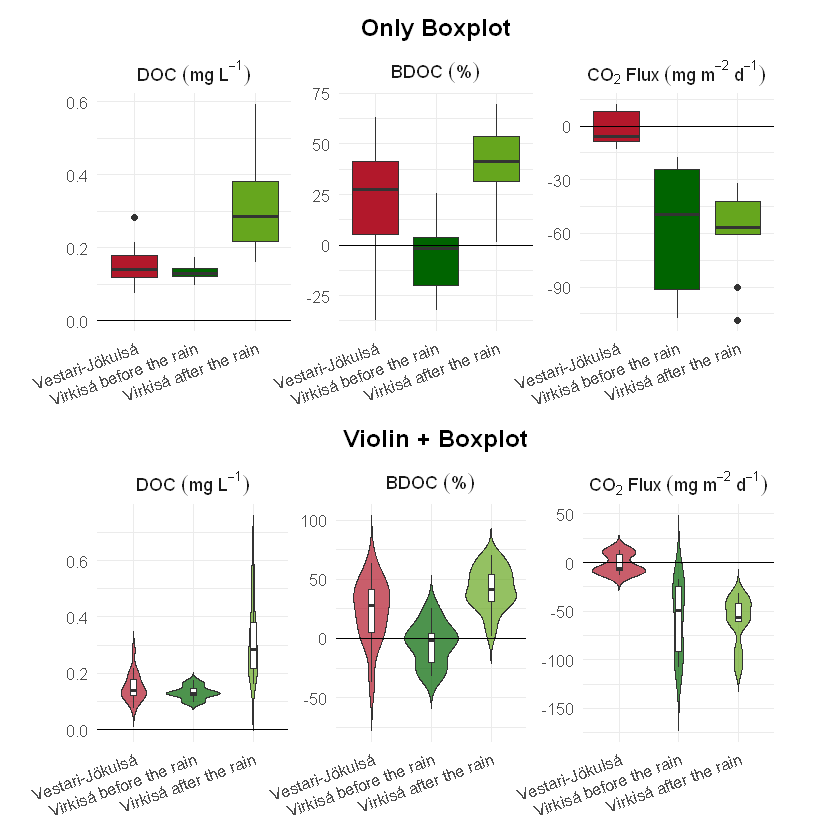

In [10]:
# 📦 Pakete laden
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)
library(patchwork)  # Für Kombination der Plots

# 📁 Datei einlesen
file_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/MASTER_DATA_short_Grouping.xlsx"
df <- read_excel(file_path)

# 📊 Daten vorbereiten
df_subset <- df %>%
  select(river_name, group_nr, average_DOC_sample, BDOC_pct, CO2_Flux) %>%
  mutate(Group = case_when(
    river_name == "Vestari_Joekulsa" ~ "Vestari-Jökulsá",
    river_name == "Virkisa" & group_nr == 1 ~ "Virkisá before the rain",
    river_name == "Virkisa" & group_nr > 1 ~ "Virkisá after the rain",
    river_name == "Virkisa" ~ "Virkisá – all"
  ))

# 📊 Nur ausgewählte Gruppen
df_long <- df_subset %>%
  filter(Group %in% c("Vestari-Jökulsá", "Virkisá before the rain", "Virkisá after the rain")) %>%
  pivot_longer(cols = c(average_DOC_sample, BDOC_pct, CO2_Flux),
               names_to = "Variable", values_to = "Value")

# 🎨 Farben festlegen
farben <- c(
  "Vestari-Jökulsá" = "#B2182B",
  "Virkisá before the rain" = "#006400",
  "Virkisá after the rain" = "#66A61E"
)

# 🏷️ Reihenfolge festlegen
df_long$Group <- factor(df_long$Group, levels = c("Vestari-Jökulsá", "Virkisá before the rain", "Virkisá after the rain"))

# 🏷️ Labels für Facets
variable_labels <- c(
  average_DOC_sample = "DOC~(mg~L^{-1})",
  BDOC_pct = "BDOC~('%')",
  CO2_Flux = "CO[2]~Flux~(mg~m^{-2}~d^{-1})"
)

# 📊 Nur Boxplot
p1 <- ggplot(df_long, aes(x = Group, y = Value, fill = Group)) +
  geom_boxplot() +
  geom_hline(yintercept = 0, linetype = "solid", color = "black", size = 0.5) +
  facet_wrap(~Variable, scales = "free_y", nrow = 1, 
             labeller = as_labeller(variable_labels, default = label_parsed)) +
  scale_fill_manual(values = farben) +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 20, hjust = 1),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 11),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.margin = margin(2, 12, 2, 12, "mm")
  ) +
  labs(
    x = NULL, y = NULL,
    title = "Only Boxplot"
  )

# 📊 Violin + Boxplot
p2 <- ggplot(df_long, aes(x = Group, y = Value, fill = Group)) +
  geom_violin(trim = FALSE, alpha = 0.7) +
  geom_boxplot(width = 0.1, fill = "white", outlier.shape = NA) +
  geom_hline(yintercept = 0, linetype = "solid", color = "black", size = 0.5) +
  facet_wrap(~Variable, scales = "free_y", nrow = 1, 
             labeller = as_labeller(variable_labels, default = label_parsed)) +
  scale_fill_manual(values = farben) +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 20, hjust = 1),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 11),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    plot.margin = margin(2, 12, 2, 12, "mm")
  ) +
  labs(
    x = NULL, y = NULL,
    title = "Violin + Boxplot"
  )

# 🧩 Kombination mit patchwork
combined_plot <- p1 + p2 + plot_layout(ncol = 1)

# 💾 Speicherpfad
output_path <- "C:/Users/sophia/Dropbox/MASTER/Master_Data_Table/FINAL/Ergebnisse_Tabelle/Comparison_Box_Violin.png"

# 💾 Plot speichern
ggsave(filename = output_path,
       plot = combined_plot,
       width = 210,   # mm
       height = 160,  # mm (mehr Platz, da zwei übereinander)
       units = "mm",
       dpi = 300,
       bg = "white",
       limitsize = FALSE)

# ✅ Plot in Jupyter anzeigen
print(combined_plot)

# ✅ Hinweis ausgeben
cat("✅ Vergleichsplot gespeichert unter:\n", output_path)
